### 4.10 Part 1.25 Mature Investor
#### 1 - importing libraries
#### 2 - Importing df
#### 3 - Analyzing  by Loyalty Flag
#### 4 - Analyzing Purshases by Income
#### 5 - Analyzing by Busiest_day
#### 6 - Analyzing number by State
#### 7 - Analyzing by n_dependants
#### 8 - Analyzing Days since prior order
#### 9 - Defining TOP products for client group
#### 10 behavior of customers with 2 dependants

### 1 Importing libraries and df w/o PII

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

### 2 Importing df

In [3]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','000MI.pkl'))

In [15]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag',
       'AgeIncome_flag'],
      dtype='object')

In [16]:
df.shape

(47168, 31)

In [17]:
df[['user_id','Age', 'income','product_id', 'order_number','mean_price']] .describe()

,user_id,Age,income,product_id,order_number,mean_price
count,47168.000000,47168.000000,47168.000000,47168.000000,47168.000000,47168.000000
mean,95787.423974,60.344810,482575.716545,25143.541956,19.269929,223.449469
std,59228.066731,12.910003,61626.812290,14493.112064,17.196489,403.798065
min,658.000000,41.000000,400310.000000,0.000000,1.000000,25.423455
25%,48172.000000,48.000000,422992.000000,12955.000000,6.000000,62.593341
50%,91437.000000,60.000000,473722.000000,25170.000000,14.000000,111.778596
75%,145089.000000,72.000000,543925.000000,37940.000000,27.000000,191.641975
max,205626.000000,81.000000,593901.000000,49683.000000,100.000000,6388.812766


### 3 -Analyzing Mature Investor by Loyalty Flag

#### --creating the subset to avoid Memory Error

In [18]:
df1=df[['user_id','fam_status','loyalty_flag']]

In [19]:
df1.shape

(47168, 3)

In [20]:
df11=df1.drop_duplicates().reset_index()

In [21]:
df11

,index,user_id,fam_status,loyalty_flag
0,44145,136298,married,Regular customer
1,91628,33595,married,Regular customer
2,136208,25696,divorced/widowed,Regular customer
3,235483,79618,married,Regular customer
4,480644,173366,married,Regular customer
...,...,...,...,...
164,9179922,144788,married,Regular customer
165,9228041,21667,single,Regular customer
166,9306418,66496,divorced/widowed,New customer
167,9324522,205626,married,New customer


#### -analyzing Mature  Investorby Loyalty Flag and Family Status

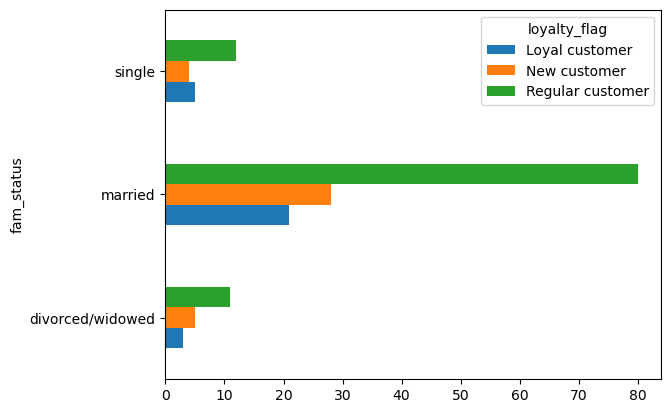

In [22]:
bar12=df11.groupby('fam_status')['loyalty_flag'].value_counts().unstack().plot.barh()

In [23]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'MI_LoyaltyFlag.png'))

### 4 -analyzing Mature  Investor purshases by their income

In [24]:
df2=df[['prices', 'income']]

In [25]:
df2['prices'].sum()

10479794.299999999

In [26]:
df22=df2.groupby('income').agg(mean_purshase=('prices','mean'))

In [27]:
df22

,mean_purshase
income,
400310,183.018047
400526,129.117073
401631,43.408845
402604,109.693103
402644,75.221818
...,...
584097,62.517654
590790,547.778182
591089,91.810734


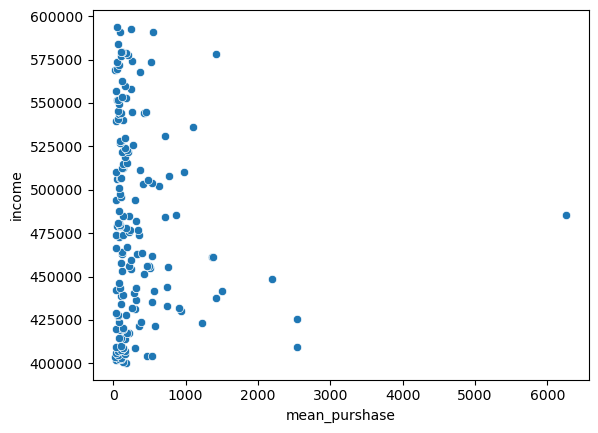

In [28]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22)

#### filter extrem big values

In [29]:
df22filtered=df22[df22['mean_purshase']<1500]

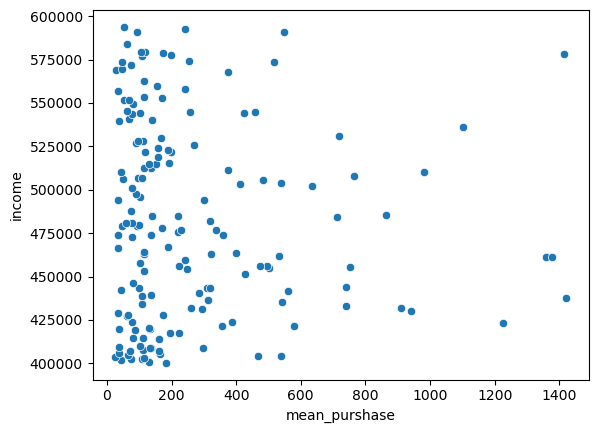

In [30]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22filtered)

In [31]:
scat3.figure.savefig(os.path.join(path, 'Prepared Data', 'MI_PricesIncome.png'))

### 5 - Analyzing Mature  Investor by Busiest_day

In [32]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [33]:
df4

,user_id,STATE,busiest_day,day_of_week
44145,136298,New Mexico,Busiest days,1
44146,136298,New Mexico,Busiest days,0
44147,136298,New Mexico,Slowest days,4
44148,136298,New Mexico,Regularly days,6
44149,136298,New Mexico,Busiest days,0
...,...,...,...,...
10896277,88351,Louisiana,Regularly days,5
10896278,88351,Louisiana,Regularly days,5
10896279,88351,Louisiana,Regularly days,2
10896280,88351,Louisiana,Regularly days,2


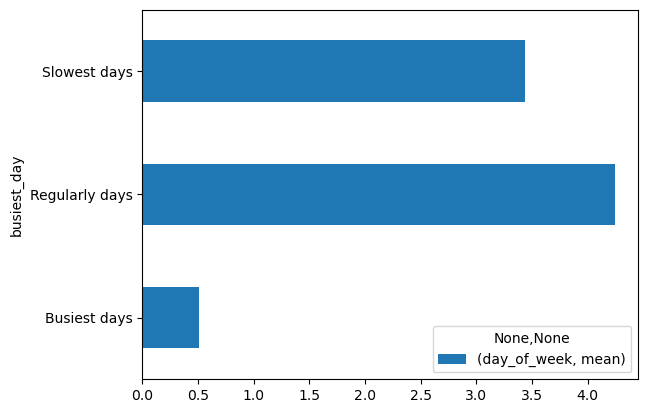

In [34]:
bar14=df4.groupby('busiest_day').agg({'day_of_week':['mean']}).plot.barh()

In [35]:
bar14.figure.savefig(os.path.join(path, 'Prepared Data', 'MI_BusiestDayOfWeek.png'))

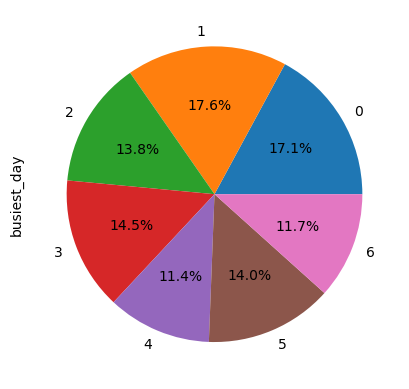

In [36]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [37]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    8065
1    8290
2    6528
3    6852
4    5355
5    6581
6    5497
Name: busiest_day, dtype: int64

In [38]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'MI_pieBusiestDayOfWeek.png'))

#### -prefered hour of day

In [39]:
df44=df[['order_hour_of_day','user_id']]

In [40]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      151
1      173
2       95
3       75
4      150
5      205
6      481
7     1723
8     2382
9     3280
10    3160
11    4005
12    4453
13    3852
14    3589
15    4396
16    3914
17    3515
18    2591
19    1597
20    1349
21     876
22     559
23     597
Name: user_id, dtype: int64

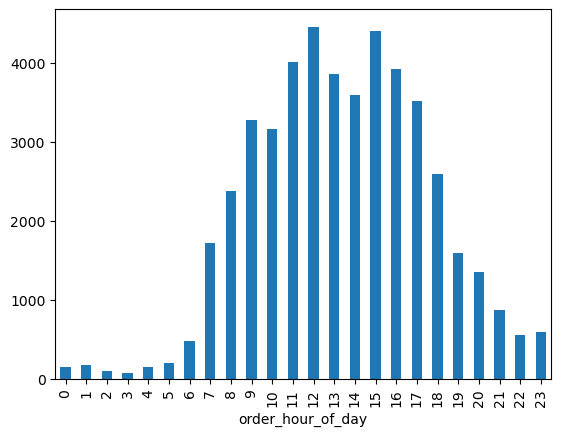

In [41]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [42]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'MI_BusiestHourOfDay.png'))

### 6 - Analyzing number of Mature  Investor by State

In [4]:
df5=df[['user_id','STATE']]

In [5]:
DF5=df5.drop_duplicates().reset_index()

In [45]:
DF5

,index,user_id,STATE
0,44145,136298,New Mexico
1,91628,33595,Mississippi
2,136208,25696,Tennessee
3,235483,79618,Connecticut
4,480644,173366,Kansas
...,...,...,...
164,9179922,144788,Wisconsin
165,9228041,21667,Tennessee
166,9306418,66496,Tennessee
167,9324522,205626,Utah


#### number of rows indicate total number of MI =

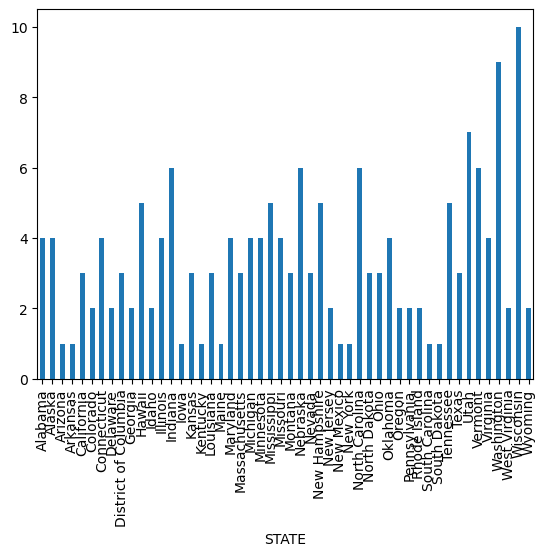

In [46]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

In [6]:
DF5.groupby('STATE')['user_id'].count()

STATE
Alabama                  4
Alaska                   4
Arizona                  1
Arkansas                 1
California               3
Colorado                 2
Connecticut              4
Delaware                 2
District of Columbia     3
Georgia                  2
Hawaii                   5
Idaho                    2
Illinois                 4
Indiana                  6
Iowa                     1
Kansas                   3
Kentucky                 1
Louisiana                3
Maine                    1
Maryland                 4
Massachusetts            3
Michigan                 4
Minnesota                4
Mississippi              5
Missouri                 4
Montana                  3
Nebraska                 6
Nevada                   3
New Hampshire            5
New Jersey               2
New Mexico               1
New York                 1
North Carolina           6
North Dakota             3
Ohio                     3
Oklahoma                 4
Oregon                

#### -defining 10 Top States

In [47]:
DF5.groupby('STATE')['user_id'].count().sort_values(ascending=False).head(10)

STATE
Wisconsin         10
Washington         9
Utah               7
North Carolina     6
Vermont            6
Nebraska           6
Indiana            6
Mississippi        5
Tennessee          5
Hawaii             5
Name: user_id, dtype: int64

#### -saving the plot

In [48]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'MI_UsersNumberState.png'))

### 7 - Analyzing Mature  Investor  by n_dependants

In [49]:
df6=df[['user_id', 'n_dependants']]

In [50]:
DF6=df6.drop_duplicates()

In [51]:
DF6.groupby(['n_dependants'])['user_id'].count()

n_dependants
0    40
1    42
2    46
3    41
Name: user_id, dtype: int64

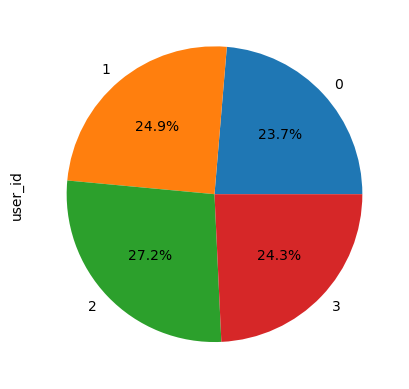

In [52]:
pie16=DF6.groupby(['n_dependants'])['user_id'].count().plot(kind='pie', autopct='%0.01f%%')

In [53]:
DF6

,user_id,n_dependants
44145,136298,3
91628,33595,2
136208,25696,0
235483,79618,1
480644,173366,2
...,...,...
9179922,144788,1
9228041,21667,0
9306418,66496,0
9324522,205626,3


#### saving the plot

In [54]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'MI_NDependansUsers.png'))

### 8 - Analyzing Days since prior order

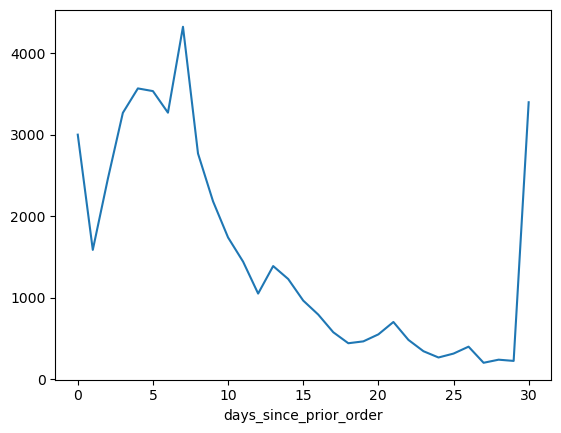

In [55]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [59]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0     3002
1     1587
2     2458
3     3270
4     3570
5     3537
6     3272
7     4327
8     2770
9     2183
10    1739
11    1442
12    1050
13    1388
14    1229
15     964
16     792
17     575
18     440
19     463
20     549
21     701
22     481
23     342
24     265
25     313
26     398
27     200
28     238
29     223
30    3400
Name: days_since_prior_order, dtype: int64

In [67]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'MI_DaysSincePriorOrder.png'))

### 9- Defining TOP products for client group


 #### creating subset

In [68]:
df18=df[['product_name','product_id','prices']]

In [69]:
df18

,product_name,product_id,prices
44145,L'Orange Sparkling Natural Mineral Water,28610,6.9
44146,Ultra Soft Facial Tissues,42240,8.2
44147,Original Baked Whole Grain Wheat Crackers,12817,4.0
44148,Bits o' Brickle Baking Chips,19356,4.0
44149,Sweeper Dry Sweeping Pad Refills for Floor Mop...,40673,5.1
...,...,...,...
10896277,Organic White Meat Chicken Skinny Burrito,8847,5.4
10896278,Organic Unsweetened Almond Milk,35951,1.3
10896279,Organic White Bread Done Right,9534,5.2
10896280,Organic Unsweetened Almond Milk,35951,1.3


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [70]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().head(11)

In [71]:
DF18

,product_name,prices
0,Banana,460
1,Lowfat 2% Milkfat Cottage Cheese,404
2,Bag of Organic Bananas,382
3,2% Reduced Fat Milk,264
4,Limes,239
5,Organic Fuji Apple,207
6,Fresh CA Grown Eggs,198
7,Large Lemon,183
8,Small Hass Avocado,182
9,,172


In [76]:
DF18=DF18.drop(index=9)

In [77]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [78]:
DF18

,product_name,count_orders
0,Banana,460
1,Lowfat 2% Milkfat Cottage Cheese,404
2,Bag of Organic Bananas,382
3,2% Reduced Fat Milk,264
4,Limes,239
5,Organic Fuji Apple,207
6,Fresh CA Grown Eggs,198
7,Large Lemon,183
8,Small Hass Avocado,182
10,100% Whole Wheat Bread,163


#### -creating plot

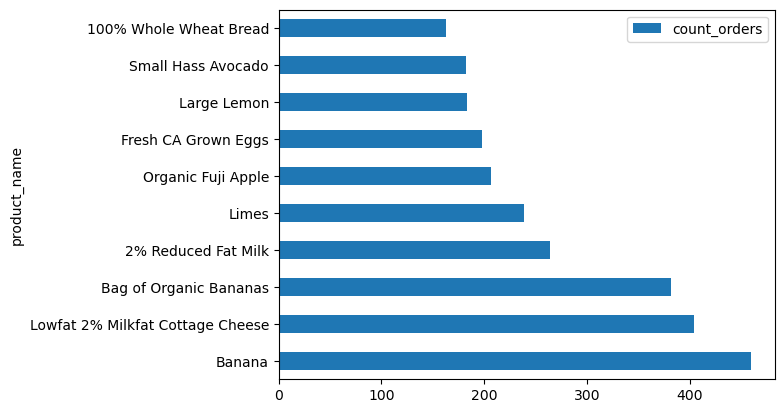

In [79]:
Bar21=DF18.plot.barh(x='product_name')

#### -saving the plot

In [80]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'MI_Products.png'))

### 10 behavior of customers with 2 dependants

In [6]:
DF_2dep=df.loc[df['n_dependants']==2]

In [10]:
DF_2dep[['user_id','department_id','prices','order_number','day_of_week', 
         'order_hour_of_day','days_since_prior_order','max_order','mean_price' ]].describe()

,user_id,department_id,prices,order_number,day_of_week,order_hour_of_day,days_since_prior_order,max_order,mean_price
count,11196.000000,11196.000000,11196.000000,11196.000000,11196.000000,11196.000000,11196.000000,11196.000000,11196.000000
mean,67680.144248,10.488657,297.520222,17.088156,2.948106,13.047249,10.229278,33.376652,299.032875
std,52365.678326,6.200171,4232.429679,14.890495,1.974895,3.891815,8.828536,19.861788,518.451933
min,6221.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,33.717944
25%,17466.000000,4.000000,4.000000,6.000000,1.000000,10.000000,4.000000,19.000000,60.160839
50%,53303.000000,12.000000,7.500000,13.000000,3.000000,13.000000,7.000000,28.000000,115.798789
75%,110090.000000,16.000000,11.400000,23.000000,5.000000,16.000000,15.000000,50.000000,241.889308
max,204073.000000,21.000000,99999.000000,77.000000,6.000000,23.000000,30.000000,77.000000,2571.269231
